<a href="https://colab.research.google.com/github/AvantikaMittapally53/PredictStockPrices/blob/main/AvantikaM_KavyaSreeS_CS620_Project_StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Stock Prices using NEWS  


##Team
Avantika Mittapally (Email: amitt002@odu.edu, Web portfolio link: https://avantikamittapally.github.io/avantikam.github.io/ )

Kavya Sree Satla (Email: ksatl001@odu.edu, Web portfolio link: https://satla98.github.io/Kavya-Sree/ )


## Abstract
Investing in stocks is a risky business. So to balance this bond between stock
and risk marketers always invest according to their expectations. These
expectations are developed by using various techniques. In this we are going
to build a model that uses real-time news data with historical stock prices
including seasonal , holidays eﬀect. The major issue is to utilize or extract
more relevant news data for better prediction. To resolve this we use real
time news and then combine historical stock prices to build a better model
to predict stock prices

## Data Source

Connect to twitter API using account credentials and capture real time tweets
using Tweepy. We can capture recent 200 tweets according to our search keyword.


In [ ]:
import tweepy
import pandas as pd
import numpy as np

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
consumer_key='y2gksQuNlStMW34wUy2dr5WHs'
consumer_secret='DYr9NyneEN5uoyHuHeeOsUlLbzxUHardF7x4XwyYHl9OczDaJu'
access_token='709011707914362881-09u0mX3jGMFSrbRSDd1Qbahd5zHCpZn'
access_token_secret='lLbZBumL5TMC7hG9fMMlLPyVcrpLCkVyZPSrbyM2VomKN'
def twitter_setup():
    auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_token_secret)
    api = tweepy.API(auth)
    return api

In [ ]:
import tweepy
extractor = twitter_setup()
tweets = extractor.user_timeline(screen_name="tesla", count = 1000)
print("number of tweets extracted: {}.\n".format(len(tweets)))
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

number of tweets extracted: 200.

5 recent tweets:

Production and deliveries in Q1 exceeded 300k vehicles https://t.co/O0OQsl6ppc

Flying Through Giga Berlin

Tesla will ask shareholders to vote at this year’s annual meeting to authorize additional shares in order to enable a stock split.

RT @elonmusk: https://t.co/SXKc1jJwmw

Come join the Giga Berlin team! https://t.co/p1PVbG8c6x https://t.co/AyBsX36lNN



In [ ]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

display(data.head(10))

,tweets
0,Production and deliveries in Q1 exceeded 300k ...
1,Flying Through Giga Berlin
2,Tesla will ask shareholders to vote at this ye...
3,RT @elonmusk: https://t.co/SXKc1jJwmw
4,Come join the Giga Berlin team! https://t.co/p...
5,First Model Y deliveries at Giga Berlin https:...
6,RT @TeslaSolar: Solar Roof lets you become you...
7,🎨 at Giga Berlin https://t.co/ojIvG9cg4F
8,Giga Berlin darf eröffnen 🇩🇪🚘 \n\nCome join th...
9,First Model Y deliveries in the UK https://t.c...


**Data Preprocessing**

The tweets we are getting are in different formats we need to change them to CSV format so that we can merge historical stock market values to these tweets.We are accessing tweets only that are written in english language so that it is easy to get the polarity of the sentence by using polarity detection algorithm. It has attributes tweets, len, ID, Date, Source, Likes, RTs and are combined to form structured dataset using pandas dataframe.




In [ ]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1510306433610432512
2022-04-02 17:21:28
Twitter for iPhone
9411
1106
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/O0OQsl6ppc', 'expanded_url': 'https://ir.tesla.com/press-release/tesla-vehicle-production-deliveries-and-date-financial-results-webcast-first-quarter', 'display_url': 'ir.tesla.com/press-release/…', 'indices': [55, 78]}]}


In [ ]:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
display(data.head(10))
list(data)

,tweets,len,ID,Date,Source,Likes,RTs
0,Production and deliveries in Q1 exceeded 300k ...,78,1510306433610432512,2022-04-02 17:21:28,Twitter for iPhone,9411,1106
1,Flying Through Giga Berlin,26,1509994532548624385,2022-04-01 20:42:05,Twitter for Advertisers.,34202,4529
2,Tesla will ask shareholders to vote at this ye...,130,1508383394018779136,2022-03-28 10:00:00,TweetDeck,39129,4392
3,RT @elonmusk: https://t.co/SXKc1jJwmw,37,1507678592741920775,2022-03-26 11:19:22,Twitter for iPhone,0,12568
4,Come join the Giga Berlin team! https://t.co/p...,79,1507391004168626186,2022-03-25 16:16:36,Twitter for iPhone,7758,1147
5,First Model Y deliveries at Giga Berlin https:...,63,1506347849965002753,2022-03-22 19:11:28,Twitter for iPhone,24707,2355
6,RT @TeslaSolar: Solar Roof lets you become you...,140,1501994731965923340,2022-03-10 18:53:44,Twitter for iPhone,0,3520
7,🎨 at Giga Berlin https://t.co/ojIvG9cg4F,40,1501601492175888384,2022-03-09 16:51:08,Twitter for iPhone,19890,1062
8,Giga Berlin darf eröffnen 🇩🇪🚘 \n\nCome join th...,75,1500386369683832833,2022-03-06 08:22:41,Twitter for iPhone,34581,3295
9,First Model Y deliveries in the UK https://t.c...,58,1496199836353409035,2022-02-22 19:06:53,Twitter for iPhone,9623,1022


['tweets', 'len', 'ID', 'Date', 'Source', 'Likes', 'RTs']

In [ ]:
# Visualization and basic stats

# We extract the mean of length
import numpy as np
mean = np.mean(data['len'])
print("the length's average in tweets: {}".format(mean))

the length's average in tweets: 85.03


In [ ]:
# We extract the tweet with more FAVs and mote RTs:

fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("the tweet with more likes is: \n{}".format(data['tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} character.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} character.\n".format(data['len'][rt]))

the tweet with more likes is: 
Cybertruck at Giga Texas https://t.co/c1RuektPnN
Number of likes: 185282
48 character.

The tweet with more retweets is: 
RT @elonmusk: Tesla merch buyable with Dogecoin
Number of retweets: 51301
47 character.



In [ ]:
tlen = pd.Series(data = data['len'].values)   #, index=data['Data'])
tfav = pd.Series(data = data['Likes'].values)   #, index=data['Data'])
tret = pd.Series(data = data['RTs'].values) #, index=data['Data']

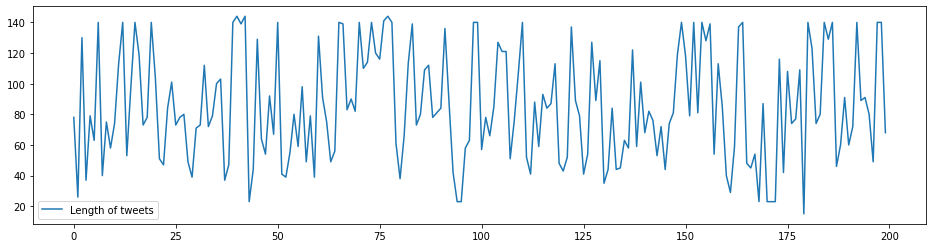

In [ ]:
tlen.plot(figsize=(16,4), label="Length of tweets", legend=True)

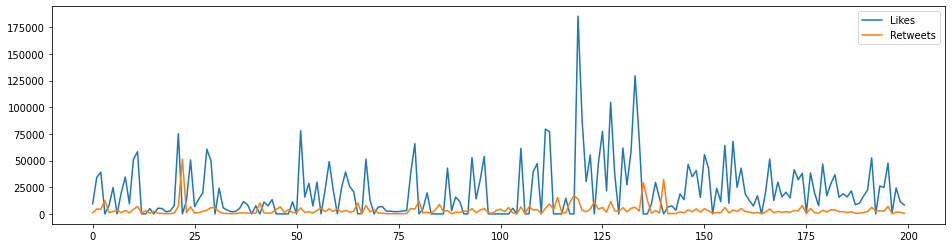

In [ ]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [ ]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for Advertisers.
* TweetDeck
* Twitter for iPad
* Twitter Web App


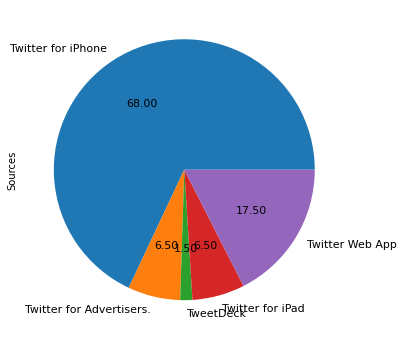

In [ ]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [ ]:
l=[]
for k in data.tweets:
    l.append(analize_sentiment(k))
data['SA'] = l

In [ ]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] < 0]

In [ ]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweets'])))

Percentage of positive tweets: 34.5%
Percentage of neutral tweets: 57.5%
Percentage de negative tweets: 8.0%


In [ ]:
data.to_csv('/content/data.csv')

In [ ]:
l=[]
import datetime
for i in range(len(data)):
    l.append(str(data["Date"][i].date()))       # for particular date 0-31 .strftime("%d")
data["new_date"]=l

In [ ]:
df=data.loc[:, ["tweets", "new_date"]]

In [ ]:
d={}
for i in range(len(df)):
    if df['new_date'][i] in df:
        d[df['new_date'][i]].append(df['tweets'][i])
    else:
        d[df['new_date'][i]]=[]
        d[df['new_date'][i]].append(df['tweets'][i])

In [ ]:
df_1=pd.DataFrame.from_dict(d, orient='index')
df_1.index.name = 'Date'
df_1=df_1.reset_index()
df_1 = df_1.rename(columns={0: 'tweets_on_that_day'})

In [ ]:
df_1

,Date,tweets_on_that_day
0,2022-04-02,Production and deliveries in Q1 exceeded 300k ...
1,2022-04-01,Flying Through Giga Berlin
2,2022-03-28,Tesla will ask shareholders to vote at this ye...
3,2022-03-26,RT @elonmusk: https://t.co/SXKc1jJwmw
4,2022-03-25,Come join the Giga Berlin team! https://t.co/p...
...,...,...
145,2019-11-23,I'm gonna tell my kids this is the first pick-...
146,2019-11-22,Cybertruck Unveil livestream starts at 8pm \nh...
147,2019-11-21,Cybertruck Unveil starts at 8\n\nStay tuned fo...
148,2019-11-13,We were very honored to accept one of Europe's...


**Polarity Detection**

There are many libraries to know the polarity of the sentence like VADER, TextBlob etc. We are using TextBlob to get the sentimental value for each tweet.If the sentimental value is less than zero we assign value -one, if the sen- timental value is greater than zero we assign value +one and zero otherwise.

In [ ]:
l=[]
for k in df_1.tweets_on_that_day:
    l.append(analize_sentiment(k))
df_1['SA'] = l

In [ ]:
df_1[15:25]


,Date,tweets_on_that_day,SA
15,2022-01-31,RT @TeslaCharging: Non-Tesla vehicles can now ...,1
16,2022-01-28,2021 was a breakthrough year for EVs. Thank yo...,0
17,2022-01-21,Graffiti art at Giga Berlin https://t.co/aOj4k...,0
18,2022-01-14,RT @elonmusk: Tesla merch buyable with Dogecoin,0
19,2022-01-12,Solar Roof keeps snow &amp; ice off your roof\...,0
20,2022-01-10,Drive anywhere in the US using the Supercharge...,0
21,2022-01-07,Plaid Track Mode now rolling out in North Amer...,0
22,2022-01-05,When you discover the megaphone… 📢 \n\n🎥: @Hay...,0
23,2022-01-02,Production &amp; deliveries in Q4 exceeded 300...,0
24,2021-12-25,Merry Christmas to all! 🎄 https://t.co/QhOMe02pxy,0


In [ ]:
# now drop columns
df_1=df_1.drop(['tweets_on_that_day'], axis=1)

In [ ]:
df_1.head()


,Date,SA
0,2022-04-02,0
1,2022-04-01,0
2,2022-03-28,0
3,2022-03-26,0
4,2022-03-25,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_1 = pd.read_csv('/content/TSLAHistData.csv')
data_1.head()

,Date,Open,High,Low,Close,Volume
0,1/4/2022,1189.550049,1208.000000,1123.050049,1149.589966,33416100
1,1/5/2022,1146.650024,1170.339966,1081.010010,1088.119995,26706600
2,1/6/2022,1077.000000,1088.000000,1020.500000,1064.699951,30112200
3,1/7/2022,1080.369995,1080.930054,1010.000000,1026.959961,28054900
4,1/10/2022,1000.000000,1059.099976,980.000000,1058.119995,30605000


In [ ]:
from datetime import datetime
l=[]
for i in range(len(data_1)):
    l.append(datetime.strptime(data_1.Date[i].split(" ")[0].strip(), '%m/%d/%Y').strftime('%Y-%m-%d'))
data_1["Date"]=l

In [ ]:
data_1.head()

,Date,Open,High,Low,Close,Volume
0,2022-01-04,1189.550049,1208.000000,1123.050049,1149.589966,33416100
1,2022-01-05,1146.650024,1170.339966,1081.010010,1088.119995,26706600
2,2022-01-06,1077.000000,1088.000000,1020.500000,1064.699951,30112200
3,2022-01-07,1080.369995,1080.930054,1010.000000,1026.959961,28054900
4,2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,30605000


**Merge NEWS data with Stock data**

Collect stock data from google finance API with NASDAQ stock market in- dex. Now search stock values of Facebook and merge them according to their date to get the actual training set.We used right join and then assign NA values to zero because it represents that their are no tweets on that day.So sentimental value is zero.


In [ ]:
df2 = df_1.merge(data_1,on="Date",how="right")
df2=df2.fillna(0)
df2=df2.sort_values(by=['Date'])
df2=df2.reset_index()
df2=df2.drop(['index'], axis=1)



In [ ]:
df2.tail()

,Date,SA,Open,High,Low,Close,Volume
57,2022-03-28,0.0,1065.099976,1097.880005,1053.599976,1091.839966,34168700
58,2022-03-29,0.0,1107.989990,1114.770020,1073.109985,1099.569946,24538300
59,2022-03-30,0.0,1091.170044,1113.949951,1084.000000,1093.989990,19955000
60,2022-03-31,0.0,1094.569946,1103.140015,1076.640015,1077.599976,16330900
61,2022-04-01,0.0,1081.150024,1094.750000,1066.640015,1084.589966,18012900


# **EDA**

**Variable Identification**

First find out dependent and independent variables that input features and output features.Next,identify the data type and category of the variables.
Target label is Volume
Input variables are Open,Close,High,Low,SA.


# **Univariate Analysis**

Explore attributes one by one.Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.First check for null values and here we have no missing values.For continuous vari- ables we have centraltendency(mean,mode,median etc)and spread of the vari- able(range,Quartile,IQR etc) and Visualization using Histogram and Box Plot.

In [ ]:
from pandas import Series, DataFrame
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df2.dtypes

Date       object
SA        float64
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
data_1.isnull().sum()     # No missing values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go


trace0 = go.Box(
    y =df2["Open"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Open"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Open"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Open"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Open"
)

fig = go.Figure(data=data,layout=layout)
fig.show(filename = "Box Plot Styling Outliers for Attribute Open")

From the figure we can say that attribute Open is negatively skewed with no outliers.Having maximum value 1189.55 ,third quartile(q3) value 1009.73,median value 913.655 , first quartile (q1) value 856.3 and minimum value 700.39.

In [ ]:
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Close"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Close"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Close"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Close"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Close"
)

fig = go.Figure(data=data,layout=layout)
fig.show(filename = "Box Plot Styling Outliers for Attribute Close")


From the figure we can say that attribute Close is negatively skewed with no outliers.Having maximum value 1149.59 ,third quartile(q3) value 1013.92,me- dian value 921.58 , first quartile (q1) value 856.98 and minimum value 764.04.

In [ ]:

import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["High"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["High"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["High"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["High"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute High"
)

fig = go.Figure(data=data,layout=layout)
fig.show(filename = "Box Plot Styling Outliers for Attribute High")


From the figure we can say that attribute High is negatively skewed with no outliers.Having maximum value 1208 ,third quartile(q3) value 1052,median value 936.75 , first quartile (q1) value 876.86 and minimum value 800.7.

In [ ]:
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Low"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Low"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Low"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Low"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Low"
)

fig = go.Figure(data=data,layout=layout)
fig.show(filename = "Box Plot Styling Outliers for Attribute Low")


From the figure we can say that attribute Low is negatively skewed with no outliers.Having maximum value 1123.05 ,third quartile(q3) value 995,me- dian value 894.09 , first quartile (q1) value 829 and minimum value 700.

In [ ]:
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Volume"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Volume"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Volume"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Volume"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Volume"
)

fig = go.Figure(data=data,layout=layout)
fig.show(filename = "Box Plot Styling Outliers for Attribute Volume")



From the figure we can say that attribute Volume is positively skewed which is having outliers with maximum value 50.5219M ,upper fence value 40.2245M
,third quartile(q3) value 30.605M,median value 24.711M , first quartile (q1) value 22.1943M and minimum value 16.3309M.


# **Bi-variate Analysis**
Bi-variate Analysis finds out the relationship between two variables. Continuous and Continuous relationship can be obtained using correla- tion and scatter plot.

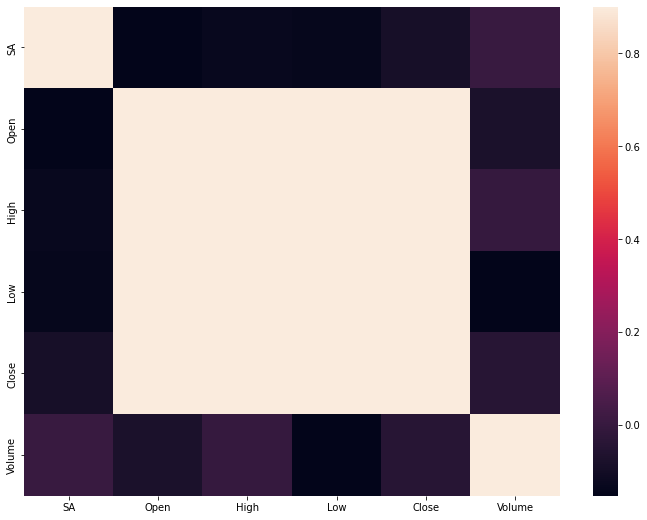

In [ ]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

We can see that dependents variables are closely related or having high similarity.

In [ ]:
import chart_studio.plotly as py
# Create traces
trace0 = go.Scatter(
    y = df2["Open"],
    x = df2["Date"],
    mode = 'markers+lines',
    name = 'Open Value',
    marker={"size": 2}
)
trace1 = go.Scatter(
    y = df2["Close"],
    x = df2["Date"],
    mode = 'lines+markers',
    name = 'Close Value',
    marker={"size": 3.5}
)
trace2 = go.Scatter(
    y = df2["High"],
    x = df2["Date"],
    mode = 'lines',
    name = 'High Value',
    marker={"size": 3}
)
trace3 = go.Scatter(
    y = df2["Low"],
    x = df2["Date"],
    mode = 'lines',
    name = 'Low Value',
    marker={"size": 3.5}
)

data = [trace0, trace1, trace2,trace3]

layout= go.Layout(
    title= 'Visualizing Attributes Open, Close ,High, Low',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Dates',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Open Value, Close Value ,High Value, Low Value',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data,layout=layout)

fig.show(filename = "scatter-mode")

In [ ]:
df2.skew(axis = 0, skipna = True)

SA        3.157115
Open      0.389641
High      0.460802
Low       0.321205
Close     0.357341
Volume    1.282593
dtype: float64

# **Detecting Outliers**
Detected Outliers by using standard deviation method.Number of outliers obtained are 1.

**Variable transformation and Outlier treatment**

So we can remove that single outlier or fill it by mean value.
Apply log transformation because it is highly skewed positively for Volume



In [ ]:
df3 = df2.Volume
d=df3[((df3-df3.mean()).abs()>3*df3.std())]
print("No of outliers by standard deviation method is ",len(d)-d.isna().sum())

No of outliers by standard deviation method is  1


In [ ]:
df2.skew(axis = 0, skipna = True)

SA        3.157115
Open      0.389641
High      0.460802
Low       0.321205
Close     0.357341
Volume    1.282593
dtype: float64

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Volume"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Volume"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Volume"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Volume"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Volume After Outlier Treatment"
)

fig = go.Figure(data=data,layout=layout)
fig.show( filename = "Box Plot Styling Outliers for Attribute Volume After Outlier Treatment")


# **Build and Train the Model**

In [ ]:
df2.head()

,Date,SA,Open,High,Low,Close,Volume
0,2022-01-04,0.0,1189.550049,1208.000000,1123.050049,1149.589966,33416100
1,2022-01-05,0.0,1146.650024,1170.339966,1081.010010,1088.119995,26706600
2,2022-01-06,0.0,1077.000000,1088.000000,1020.500000,1064.699951,30112200
3,2022-01-07,0.0,1080.369995,1080.930054,1010.000000,1026.959961,28054900
4,2022-01-10,0.0,1000.000000,1059.099976,980.000000,1058.119995,30605000


# **Open,Close,High,Low are dependent variables**

In [ ]:
from sklearn.linear_model import LinearRegression
X = df2[['SA','Volume']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df2['Open']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test_open = train_test_split(X, Y, test_size = 0.15, random_state = 3)

#### Fitting Multiple Linear Regression to the Training setfrom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_open = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test_open, y_pred_open)

0.0648384127874354

# **explained_{}variance(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}} tex commands**

Accuracy is evaluated using these formula
If the value is less than zero then the model is worse.
If the value is close to 1 then it is the best model.


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_open, y_pred_open)

0.0557069039854412

In [ ]:
# Similarly for other  dependent variables

In [ ]:
Y= df2['Close']
X_train, X_test, y_train, y_test_close = train_test_split(X, Y, test_size = 0.15, random_state = 3)

#### Fitting Multiple Linear Regression to the Training setfrom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_close = regressor.predict(X_test)
explained_variance_score(y_test_close, y_pred_close)

0.014967843141496129

In [ ]:
Y= df2['High']
X_train, X_test, y_train, y_test_high = train_test_split(X, Y, test_size = 0.15, random_state = 3)

#### Fitting Multiple Linear Regression to the Training setfrom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_high = regressor.predict(X_test)
explained_variance_score(y_test_high, y_pred_high)

0.057819596149092045

In [ ]:
Y= df2['Low']
X_train, X_test, y_train, y_test_low = train_test_split(X, Y, test_size = 0.15, random_state = 3)

#### Fitting Multiple Linear Regression to the Training setfrom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_low = regressor.predict(X_test)
explained_variance_score(y_test_low, y_pred_low)

0.06905793681369565

In [ ]:
# Create traces
trace0 = go.Scatter(
    y = y_pred_open,
    x = df2["Date"][len(df2["Date"])-len(y_pred_open):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_pred_open',
    marker={"size": 2}
)
trace1 = go.Scatter(
    y = y_test_open,
    x = df2["Date"][len(df2["Date"])-len(y_pred_open):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_test_open',
    marker={"size": 3.5}
)
trace2 = go.Scatter(
    y = y_pred_close,
    x = df2["Date"][len(df2["Date"])-len(y_pred_close):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_pred_close',
    marker={"size": 3}
)
trace3 = go.Scatter(
    y = y_test_close,
    x = df2["Date"][len(df2["Date"])-len(y_pred_close):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_test_close',
    marker={"size": 3.5}

)

trace4 = go.Scatter(
    y = y_pred_high,
    x = df2["Date"][len(df2["Date"])-len(y_pred_high):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_pred_high',
    marker={"size": 2}
)
trace5 = go.Scatter(
    y = y_test_high,
    x = df2["Date"][len(df2["Date"])-len(y_pred_high):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_test_high',
    marker={"size": 3.5}
)
trace6 = go.Scatter(
    y = y_pred_low,
    x = df2["Date"][len(df2["Date"])-len(y_pred_low):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_pred_low',
    marker={"size": 3}
)
trace7 = go.Scatter(
    y =  y_test_low,
    x = df2["Date"][len(df2["Date"])-len(y_pred_low):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_test_low',
    marker={"size": 3.5}

)

data = [trace0, trace1, trace2,trace3,trace4, trace5, trace6,trace7]
layout= go.Layout(
    title= 'Visualizing  Test and Predicted Attributes  ',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Dates',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Test and Predicted Values',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = go.Figure(data=data,layout=layout)
fig.show( filename ='scatter-mode')

## Goal

Stock prices are  unstable and cannot be determined very easily. We need  both technical and domain expert to analyse and invest accordingly. It helps to yield sufficient profit for the company.
Stock price prediction is a process in which we use previous historical data of stock to predict future stock prices. NEWS also as an impact or effect on stock prices. So we take holidays, seasonal effects along with NEWS into account.
Stock Market Index is a measurement of a section of the stock market.
Three major U.S. stock indices are NASDAQ Composite, Dow Jones Industrial Average, and SP 500.

### Prediction methods..
**Fundamental analysis**:They evaluate a company's past performance as well as the credibility of its accounts.

**Technical analysis**: They seek to determine the future price of a stock based solely on the trends of the past price.

**Technological Methods** : Machine learning (ML) is a sub-ﬁeld of AI and at a high level, ML systems look at tons of data and come up with rules to predict outcomes for unseen data.

**Use news as an special attribute and take relevant  real time Tweets data using Tweepy. According to the polarity of NEWS data merge different algorithmic techniques to  predict stock prices accurately.**



##Video Presentation
https://youtu.be/emCeWuRz4-A

## Tools/Technologies

The tools used for the purpose of this reasearch project will be:

*   **Google Colab -** Google Colab, a.k.a Colaboratory or "Colab" for short, is a hosted Jupyter notebook service from Google Research that allows to write and execute the python language code through an internet browser. It is especially well suited for data science purpose including both data analysis and manchine learning.

*   **Github -** We will use the github project for maintaning code versions, uploading datasets and extracting them on colab.

*   **Python -** Python is an interpreted high-level general-purpose programming language will be used here for data wrangling

## Project Plan

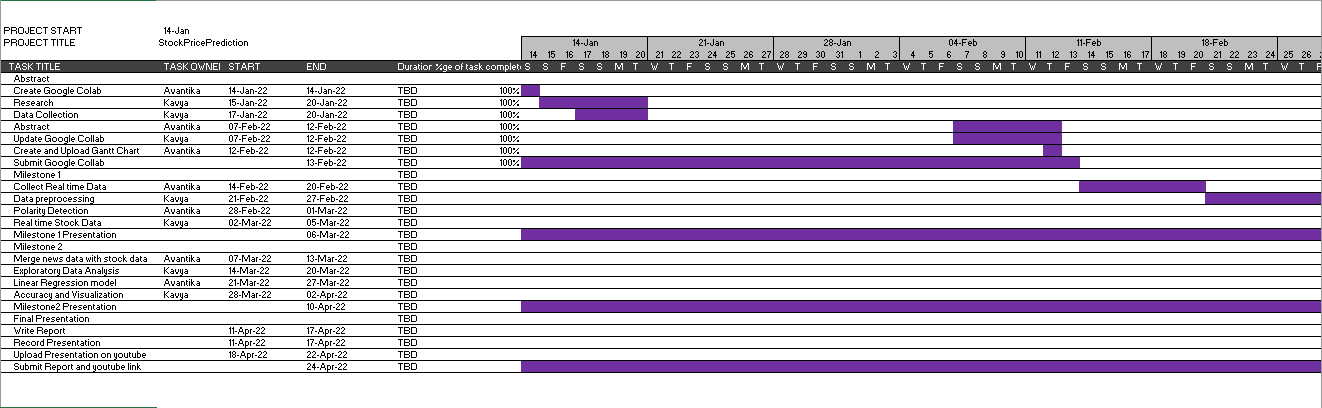